## Measuring Model's Performance: Silhouette Score


**Silhouette Score Usage:**
1. Choosing the Optimal Number of Clusters (K).
2. Evaluating the Quality of Clustering.
3. Comparing Different Clustering Algorithms.
4. Detecting the Presence of Overlapping Clusters.
5. Monitoring Clustering Stability.

**Silhouette Score Definition:**

**a(i)** - is the mean distance from data point i to all other data points in the same cluster.

**b(i)** - is the smallest mean distance from data point i to all data points in a different cluster.

The silhouette score for a data point i:

$silhouette(i)=\frac{b(i)−a\left(i\right)}{\max \left(a(i),b(i)\right)}$


The overall silhouette score for a clustering result:

$\frac{1}{N}\sum _{i=1}^Nsilhouette(i)$



In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generate some sample data
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

For K = 2, the average silhouette score is 0.5902182019276141
For K = 3, the average silhouette score is 0.7569108532473462
For K = 4, the average silhouette score is 0.7915830011443039
For K = 5, the average silhouette score is 0.6890369421581084


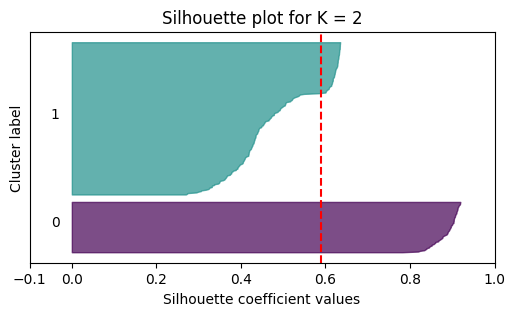

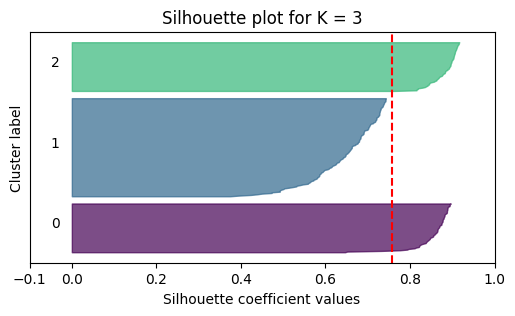

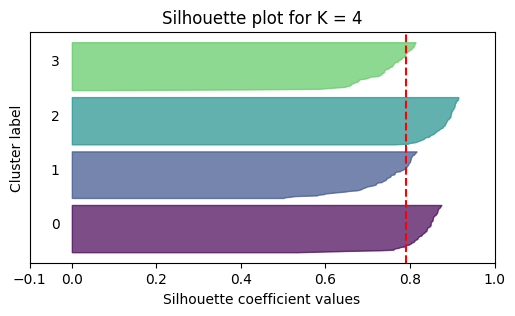

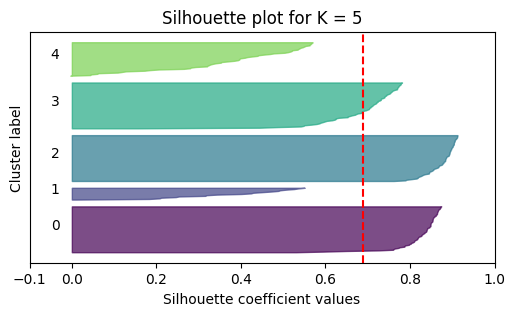

In [3]:
silhouette_scores = []

for n_clusters in range(2, 6):  # Trying K values from 2 to 5
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 3)

    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For K = {n_clusters}, the average silhouette score is {silhouette_avg}")
    
    silhouette_scores.append(silhouette_avg)

    # Calculate silhouette scores for each data point
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for K = {n_clusters}")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

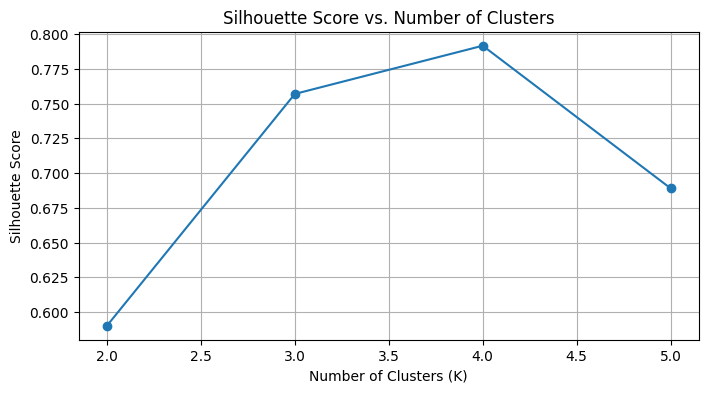

In [4]:
# Plot the silhouette scores for different values of K
plt.figure(figsize=(8, 4))
plt.plot(range(2, 6), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()